In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

(500, 1)
(500,)


/usr/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


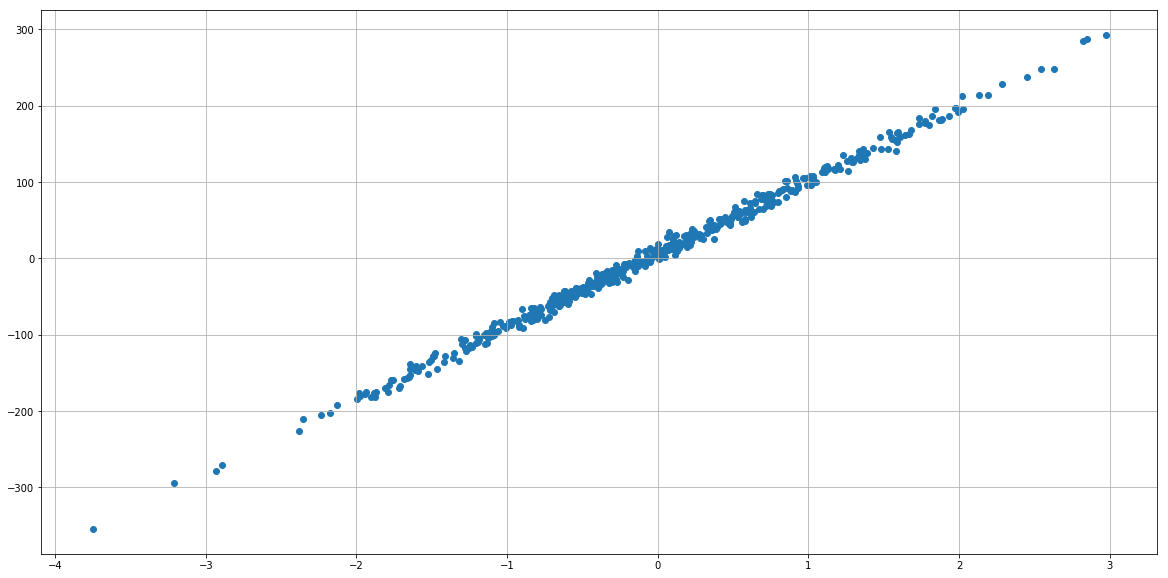

In [15]:
(X, y) = make_regression(n_samples=500, noise=6.5, bias=7.5, n_features=1)
print X.shape
print y.shape

plt.figure(0)
plt.scatter(X, y)
plt.grid('on')
plt.show()

plt.figure(1)


In [4]:
split = int(0.8*X.shape[0])
X_train = X[:split]
X_test = X[split:]

Y_train = y[:split]
Y_test = y[split:]
print X_train.shape
X_train[0]

(400, 1)


array([1.00148719])

In [5]:
def hypothesis(x1,w):
    x0 = 1
    h = w[0]*x0 + w[1]*x1
    return h

In [6]:
def get_error(x,w,y_true):
    error = 0.0
    m = x.shape[0]
    for ix in range(m):
        error += (hypothesis(x[ix],w)-y_true[ix])**2
    error /= (2*m)
    return error

In [7]:
def get_grads(x,w,y_true):
    grad_0 = 0.0
    grad_1 = 0.0
    
    m = x.shape[0]
    for ix in range(m):
        grad_0 += (hypothesis(x[ix], w)- y_true[ix])*(-1)
        grad_1 += (hypothesis(x[ix], w) - y_true[ix])*(-1*x[ix][0])
    
    return [grad_0, grad_1]

In [8]:
def gradient_descent(x,w,y_true,learning_rate=0.001):
    error = get_error(x, w, y_true)
    [grad_0, grad_1] = get_grads(x, w, y_true)
    
    w[0] = w[0] + learning_rate*grad_0
    w[1] = w[1] + learning_rate*grad_1
    
    return w, error

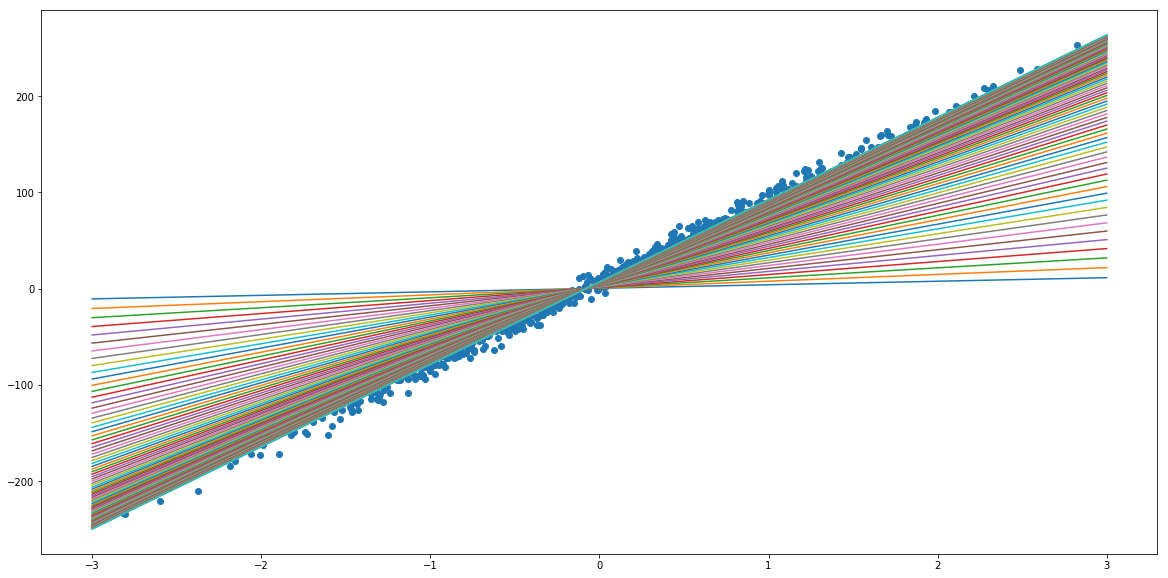

[22.24215075]


In [9]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(X, y)
n_epochs = 100
lr = 0.0001
error_logs = []
W = np.array([0.1, 0.1])
x = np.linspace(-3, 3, 10)
for ix in range(n_epochs):
    W, error = gradient_descent(X_train, W, Y_train, learning_rate=lr)
    plt.plot(x,W[0]+W[1]*x)
    error_logs.append(error)
plt.show()
print error_logs[-1]

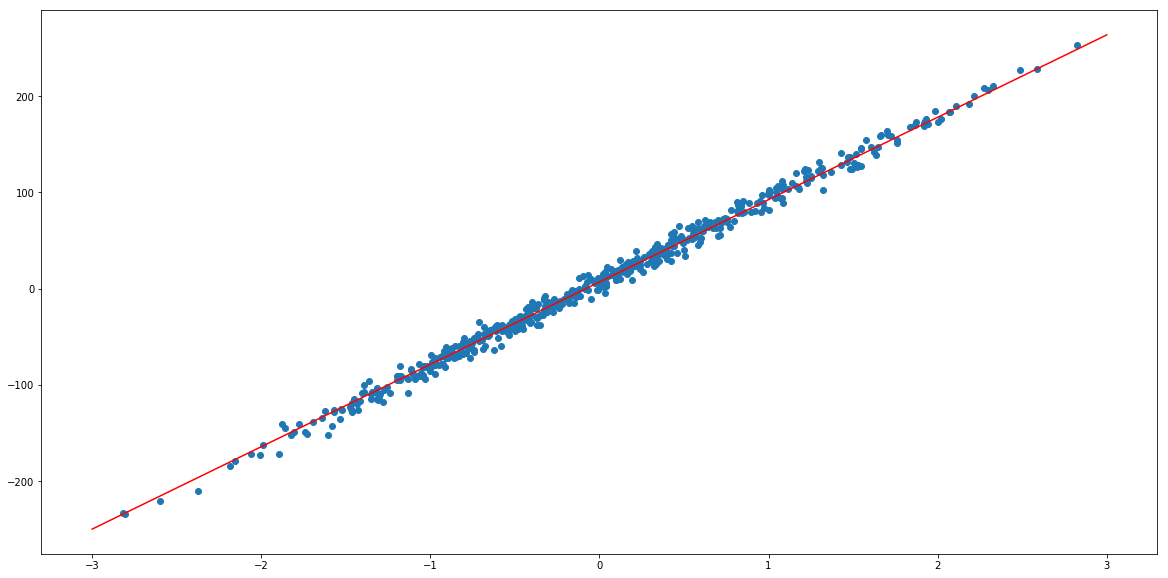

In [14]:
plt.scatter(X, y)
plt.plot(x,W[0]+W[1]*x,c='r')
plt.show()

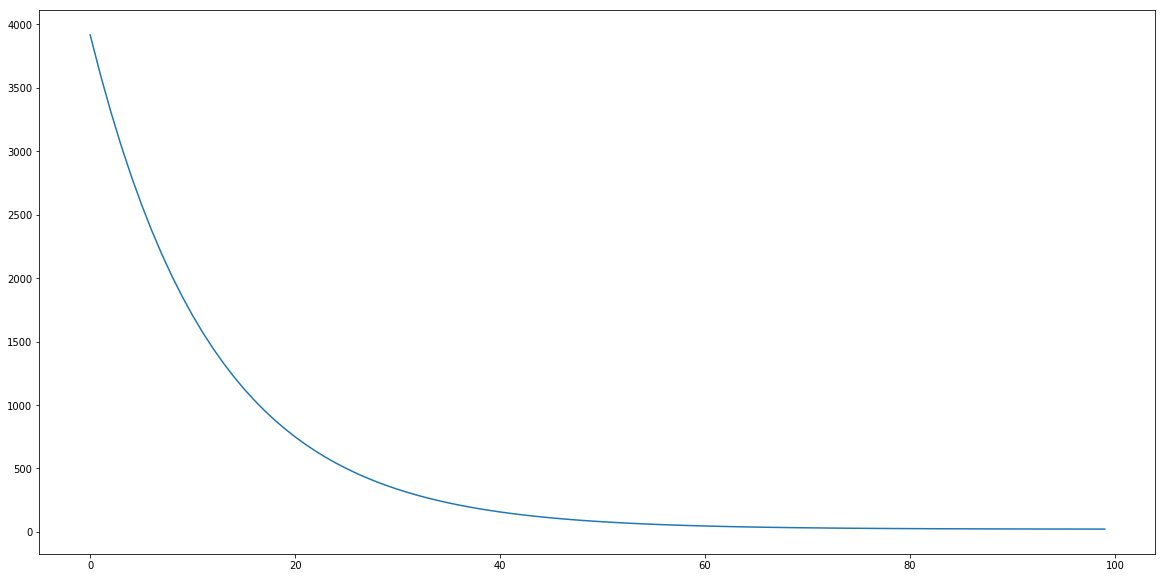

In [10]:
plt.plot(error_logs)
plt.show()

In [11]:
def get_test_loss(X_test,Y_test):
    ctr = 0.0
    for ix in range(X_test.shape[0]):
        cur_x = X_test[ix][0]
        pred_y = W[0]+W[1]*cur_x
        ctr += (pred_y-Y_test[ix])**2
    print ctr/Y_test.shape[0]

In [12]:
get_test_loss(X_test,Y_test)

47.26005116768716
